In [189]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box

from rasterstats import zonal_stats



In [3]:
gdf = gpd.read_file('../data/raw_data/cpt/trees.gdb')

In [4]:
gdf.head()

Shape_Length  Shape_Area                                           geometry
0      5.962470    2.018137  MULTIPOLYGON (((2055563.838 -4072718.944, 2055...
1      8.293162    4.294993  MULTIPOLYGON (((2055521.354 -4072738.420, 2055...
2      5.525472    1.944026  MULTIPOLYGON (((2055466.127 -4072728.039, 2055...
3      8.784972    2.337527  MULTIPOLYGON (((2055447.210 -4072723.133, 2055...
4     11.611864    8.661404  MULTIPOLYGON (((2055438.382 -4072727.947, 2055...

In [19]:
gdf.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
import osmnx

Points

In [122]:
# Kloof Street
center_point = (-33.930054, 18.410666)

In [7]:
# Company gardens
center_point = (-33.928973, 18.415704)

In [78]:
# Mitchells Plain hospital
center_point = (-34.022914, 18.614796)

In [125]:
# Grassy Park - Grassdale High School

center_point = (-34.043445, 18.505037)

In [8]:
company_gardens = osmnx.graph.graph_from_point(center_point, dist=1000, dist_type='bbox', network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=None, custom_filter=None)

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [79]:
mitchells = osmnx.graph.graph_from_point(center_point, dist=1000, dist_type='bbox', network_type='all', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=None, custom_filter=None)

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [123]:
kloof = osmnx.graph.graph_from_point(center_point, dist=1000, dist_type='bbox', network_type='all', simplify=False, retain_all=False, truncate_by_edge=False, clean_periphery=None, custom_filter=None)

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [126]:
grassy = osmnx.graph.graph_from_point(center_point, dist=1000, dist_type='bbox', network_type='all', simplify=False, retain_all=False, truncate_by_edge=False, clean_periphery=None, custom_filter=None)

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


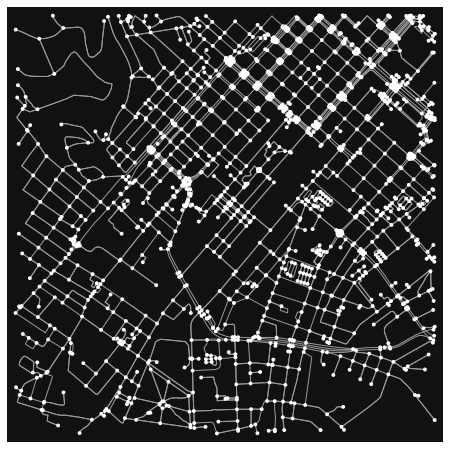

In [9]:
osmnx.plot_graph(company_gardens);

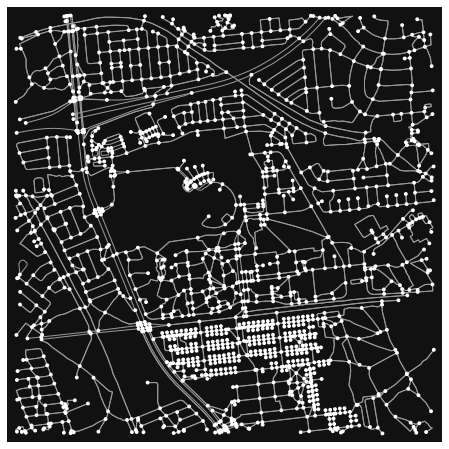

In [80]:
osmnx.plot_graph(mitchells);

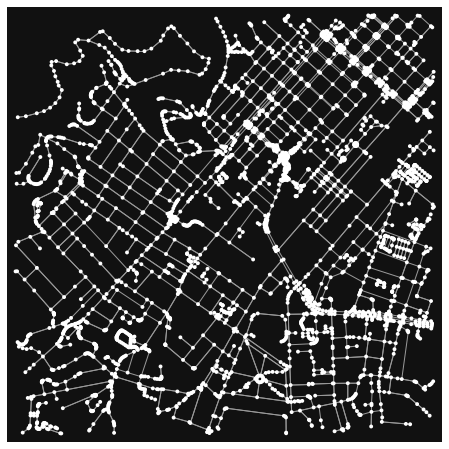

In [127]:
osmnx.plot_graph(kloof);

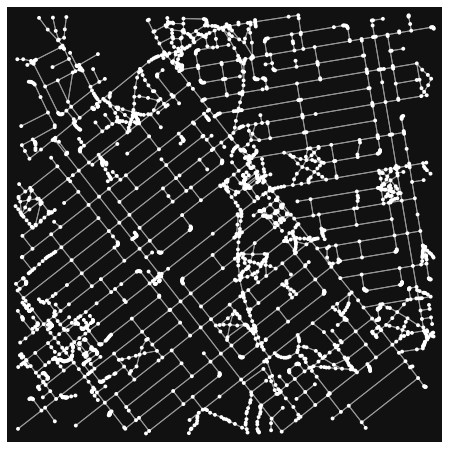

In [129]:
osmnx.plot_graph(grassy);

In [173]:
nodes, edges = osmnx.utils_graph.graph_to_gdfs(mitchells, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

<AxesSubplot:>

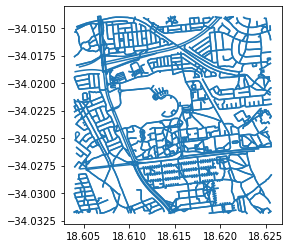

In [174]:
edges.plot()

In [175]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [176]:
edges.to_crs(gdf.crs, inplace=True)

In [177]:
edges.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [178]:
bounding_box = edges.total_bounds

In [179]:
# Assuming `edges` is your GeoDataFrame
bounding_box = edges.total_bounds

# Filter GeoDataFrame using the bounding box
filtered_gdf = gdf.cx[bounding_box[0]:bounding_box[2], bounding_box[1]:bounding_box[3]]


<AxesSubplot:>

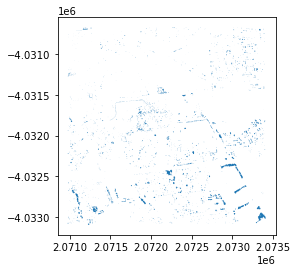

In [180]:
filtered_gdf.plot()

In [160]:
# Open the raster file using Rasterio
raster_file = "../data/clean_data/solar/cpt_kloof/2015_01_19_monthlyFlux.tif"
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)
    raster_transform = src.transform

In [161]:
# Use the Geopandas overlay function to create a mask of the overlapping areas
result = gpd.overlay(filtered_gdf, filtered_gdf, how='union')

/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_16292/738554133.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 420 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  result = gpd.overlay(filtered_gdf, filtered_gdf, how='union')


In [182]:
# Open the raster file using Rasterio
raster_file = "../data/clean_data/solar/cpt_mitchells/2015_01_19_monthlyFlux.tif"
with rasterio.open(raster_file) as src:
    # Reproject the vector layer to match the raster's CRS (32631)
    filtered_gdf = filtered_gdf.to_crs(src.crs)

    # Read the raster data
    raster_data = src.read()
    raster_transform = src.transform

# Create a mask of the polygons on the raster
mask = geometry_mask(filtered_gdf['geometry'], out_shape=raster_data.shape[1:], transform=raster_transform)

# Invert the mask (True becomes False, and False becomes True)
inverse_mask = np.logical_not(mask)

# Set pixel values where polygons overlap to a specific value (e.g., 255)
for band in range(raster_data.shape[0]):
    # Calculate the minimum value for the current band
    min_value = np.min(raster_data[band])
    
    raster_data[band][inverse_mask] = min_value


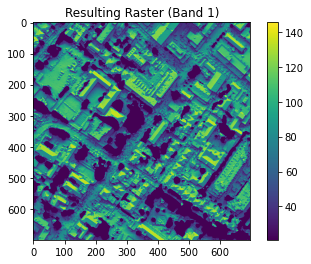

In [163]:
# Plot the resulting raster (you can choose a band to visualize)
# For example, to plot the first band:
plt.imshow(raster_data[7], cmap='viridis')
plt.colorbar()
plt.title('Resulting Raster (Band 1)')
plt.show()

In [164]:
# Calculate per pixel shade index
for band in range(raster_data.shape[0]):
    max_value = np.max(raster_data[band])
    raster_data[band] = 1 - (raster_data[band]/max_value)

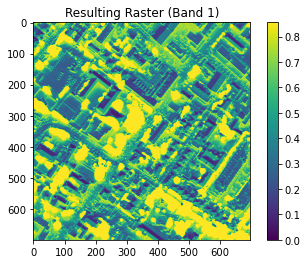

In [165]:
# Plot the resulting raster (you can choose a band to visualize)
# For example, to plot the first band:
plt.imshow(raster_data[7], cmap='viridis')
plt.colorbar()
plt.title('Resulting Raster (Band 1)')
plt.show()

In [166]:
# Save the modified raster including all bands
output_raster_file = "../results/output/cpt_kloof_shade_index.tif"
with rasterio.open(output_raster_file, 'w', driver='GTiff', width=raster_data.shape[2], height=raster_data.shape[1], count=raster_data.shape[0], dtype=raster_data.dtype, crs=src.crs, transform=raster_transform) as dest:
    for band_idx in range(raster_data.shape[0]):
        dest.write(raster_data[band_idx], band_idx + 1)

# shade index average on verhardingen

In [181]:
# Open the raster file using Rasterio to get its extent
shade_index = "../results/output/cpt_mitchells_shade_index.tif"
with rasterio.open(shade_index) as src:
    shade_extent = src.bounds
    raster_bbox = box(src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)
    raster_crs = src.crs


In [168]:
shade_extent

BoundingBox(left=260479.5, bottom=6242404.5, right=260828.5, top=6242754.5)

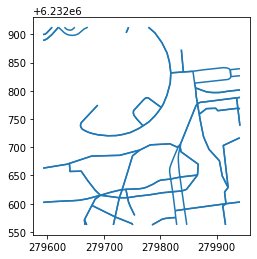

In [206]:
# Open the GeoPackage vector file using GeoPandas, filtering by the raster extent
edges.to_crs(raster_crs, inplace=True)
#No need to intersect, can directly clip.
#verhardingen = verhardingen[verhardingen.intersects(raster_bbox)]
edges_clip = edges.clip(raster_bbox)
edges_clip.plot()
edges_clip.geometry = edges_clip.buffer(2)
edges_clip = edges_clip.drop(columns=['osmid','lanes','oneway','length','ref','name'])
# edges_clip.reset_index(inplace=True)
# edges_clip = edges_clip.explode()


In [199]:
edges_clip.head()

highway  oneway   length  ref  \
u          v          key                                      
1246597223 7029267111 0    residential    True  112.345  NaN   
1246597350 8324349941 0    residential    True   79.237  NaN   
7029267111 1246597263 0    residential    True   12.194  NaN   
1246597350 1246597263 0        service   False   16.910  NaN   
1246597263 1246597350 0        service   False   16.910  NaN   

                                             name  \
u          v          key                           
1246597223 7029267111 0    Bathanda Mdingi Street   
1246597350 8324349941 0    Bathanda Mdingi Street   
7029267111 1246597263 0    Bathanda Mdingi Street   
1246597350 1246597263 0                       NaN   
1246597263 1246597350 0                       NaN   

                                                                    geometry  \
u          v          key                                                      
1246597223 7029267111 0    POLYGON ((279825.331 6232575.337, 279825.316 6...   
1246597350 8324349941 0    POLYGON ((279848.821 6232562.788, 279848.840 6...   
7029267111 1246597263 0    POLYGON ((279824.056 6232587.481, 279824.045 6...   
1246597350 1246597263 0    POLYGON ((279826.336 6232585.711, 279826.140 6...   
1246597263 1246597350 0    POLYGON ((279842.523 6232592.135, 279842.718 6...   

                          maxspeed bridge width service junction tunnel  
u          v          key                                                
1246597223 7029267111 0         20    NaN   NaN     NaN      NaN    NaN  
1246597350 8324349941 0         20    NaN   NaN     NaN      NaN    NaN  
7029267111 1246597263 0         20    NaN   NaN     NaN      NaN    NaN  
1246597350 1246597263 0        NaN    NaN   NaN     NaN      NaN    NaN  
1246597263 1246597350 0        NaN    NaN   NaN     NaN      NaN    NaN

In [187]:
edges_clip.shape

(144, 24)

In [ ]:
## Not working properly?
import geopandas as gpd
import rasterio
from rasterio import mask
import numpy as np

# Assuming `edges_clip` is your GeoDataFrame with linestrings and `shade_index` is the path to the raster file
with rasterio.open(shade_index) as src:
    # Read the raster bands
    bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]

    # Initialize lists to store average values for each band
    average_values_list = [[] for _ in bands]

    # Iterate over the GeoDataFrame rows
    for index, row in edges_clip.iterrows():
        linestring = row['geometry']
        
        # Convert the linestring to a GeoDataFrame with a single row
        linestring_gdf = gpd.GeoDataFrame(geometry=[linestring], crs=edges_clip.crs)

        # Initialize a list to store average values for each band
        average_values = []

        # Iterate over the bands
        for band_idx, band in enumerate(bands):
            # Use the linestring to clip the band
            clipped_band, _ = mask.mask(src, linestring_gdf.geometry, crop=True, nodata=np.nan, indexes=band_idx + 1)

            # Calculate the average pixel value for this band along the linestring
            average_pixel_value = np.nanmean(clipped_band)
            average_values_list[band_idx].append(average_pixel_value)

    # Add columns for each band's average pixel value to the GeoDataFrame
    for band_idx, avg_values in enumerate(average_values_list):
        edges_clip[f'Shade_index_Band_{band_idx+1}'] = avg_values

# Display the updated GeoDataFrame
print(edges_clip)

# Save the GeoDataFrame to GeoJSON
output_path = '../results/output/cpt_grassy_shade_index.geojson'
try:
    edges_clip.to_file(output_path, driver='GeoJSON')
    print(f"GeoDataFrame saved to {output_path}")
except Exception as e:
    print(f"Error saving GeoDataFrame: {e}")


In [188]:
import geopandas as gpd
import rasterio
from rasterio import mask
import numpy as np

# Assuming `edges_clip` is your GeoDataFrame with linestrings and `shade_index` is the path to the raster file
with rasterio.open(shade_index) as src:
    # Read the raster bands
    bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]

    # Initialize lists to store average values for each band
    average_values_list = [[] for _ in bands]

    # Iterate over the GeoDataFrame rows
    for index, row in edges_clip.iterrows():
        linestring = row['geometry']

        # Initialize a list to store average values for each band
        average_values = []

        # Iterate over the bands
        for band_idx, band in enumerate(bands):
            # Use the linestring to mask the band
            clipped_band, _ = mask.mask(src, [linestring], crop=True, nodata=np.nan, indexes=band_idx + 1)

            # Calculate the average pixel value for this band along the linestring
            average_pixel_value = np.nanmean(clipped_band)
            average_values_list[band_idx].append(average_pixel_value)

    # Add columns for each band's average pixel value to the GeoDataFrame
    for band_idx, avg_values in enumerate(average_values_list):
        edges_clip[f'Shade_index_Band_{band_idx+1}'] = avg_values

# Display the updated GeoDataFrame
# print(edges_clip)

# Save the GeoDataFrame to GeoJSON
output_path = '../results/output/cpt_mitchells_shade_index.geojson'
try:
    edges_clip.to_file(output_path, driver='GeoJSON')
    print(f"GeoDataFrame saved to {output_path}")
except Exception as e:
    print(f"Error saving GeoDataFrame: {e}")


Error saving GeoDataFrame: Invalid field type <class 'list'>


In [207]:
## Nice method to easily get more descriptive statistics for each verhardingen surface.

#Calculate shade index per verhardingen surface for all of the months and add them as individual columns.
edges_clip = edges_clip.reset_index()
with rasterio.open(shade_index) as src:
    # Read the raster bands
    bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]
    affine = src.transform
    crs = src.crs
    month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Iterate over bands and compute statistics for the whole verhardingen dataset
    for band_idx, band in enumerate(bands):
        band_stats = zonal_stats(edges_clip, band, affine=affine, stats=['min','max','mean','median','sum','range','std'], nodata=-999)
        #band_stats are saved in a dictionary. We use the dictionary to add these to the respective row in verhardingen, creating a new column for each stat and band.
        for idx, item in edges_clip.iterrows():
            row_stats = band_stats[idx]
            for key, value in row_stats.items():
                edges_clip.at[idx, f'SI_{month_list[band_idx]}_{key}'] = value

# Save the GeoDataFrame to GeoJSON
output_path = '../results/output/cpt_mitchells_shade_index.geojson'
try:
    edges_clip.to_file(output_path, driver='GeoJSON')
    print(f"GeoDataFrame saved to {output_path}")
except Exception as e:
    print(f"Error saving GeoDataFrame: {e}")

Error saving GeoDataFrame: Invalid field type <class 'list'>


/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [205]:
edges_clip.dtypes

level_0            int64
index              int64
u                  int64
v                  int64
key                int64
                  ...   
SI_Dec_mean      float64
SI_Dec_sum       float64
SI_Dec_std       float64
SI_Dec_median    float64
SI_Dec_range     float64
Length: 101, dtype: object

In [202]:
edges_clip.shape

(144, 100)

In [203]:
edges_clip.head()

index           u           v  key      highway  oneway   length  ref  \
0      0  1246597223  7029267111    0  residential    True  112.345  NaN   
1      1  1246597350  8324349941    0  residential    True   79.237  NaN   
2      2  7029267111  1246597263    0  residential    True   12.194  NaN   
3      3  1246597350  1246597263    0      service   False   16.910  NaN   
4      4  1246597263  1246597350    0      service   False   16.910  NaN   

                     name                                           geometry  \
0  Bathanda Mdingi Street  POLYGON ((279825.331 6232575.337, 279825.316 6...   
1  Bathanda Mdingi Street  POLYGON ((279848.821 6232562.788, 279848.840 6...   
2  Bathanda Mdingi Street  POLYGON ((279824.056 6232587.481, 279824.045 6...   
3                     NaN  POLYGON ((279826.336 6232585.711, 279826.140 6...   
4                     NaN  POLYGON ((279842.523 6232592.135, 279842.718 6...   

   ... SI_Nov_std SI_Nov_median SI_Nov_range SI_Dec_min SI_Dec_max  \
0  ...   0.013538      0.010206     0.093382   0.000106   0.096339   
1  ...   0.008799      0.005383     0.066591   0.000056   0.075782   
2  ...   0.003054      0.005879     0.015580   0.000119   0.010082   
3  ...   0.003458      0.004924     0.016295   0.000136   0.010163   
4  ...   0.003458      0.004924     0.016295   0.000136   0.010163   

  SI_Dec_mean  SI_Dec_sum  SI_Dec_std  SI_Dec_median  SI_Dec_range  
0    0.008320    1.980064    0.013520       0.002491      0.096234  
1    0.005665    2.673646    0.008869       0.001036      0.075726  
2    0.001858    0.455285    0.001516       0.001429      0.009963  
3    0.001596    0.512309    0.001925       0.000907      0.010028  
4    0.001596    0.512309    0.001925       0.000907      0.010028  

[5 rows x 100 columns]

In [49]:
from rasterio import mask

Checking whether the verhardingen dataset overlaps correctly.

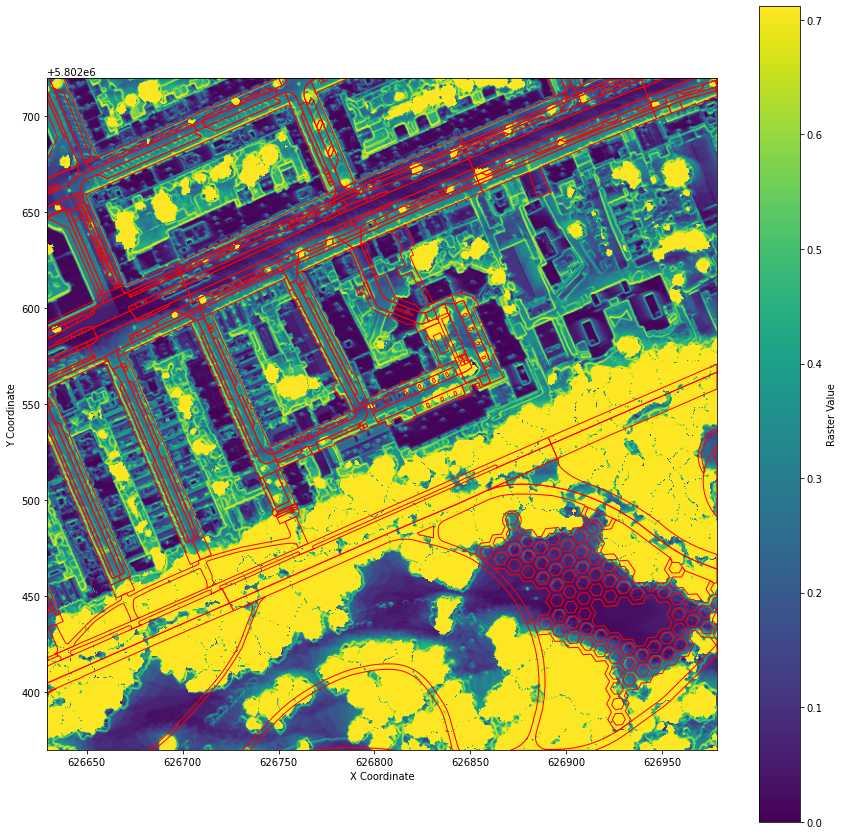

In [6]:
with rasterio.open(shade_index) as src:
    # Read the raster data for visualization (you can choose a specific band if needed)
    raster_data = src.read(7)  # Replace "1" with the band index you want to visualize
    raster_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]



# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the raster data
cax = ax.imshow(raster_data, cmap='viridis', extent=raster_extent, origin='upper')

# Plot the vector data on top
verhardingen.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)

# Add a colorbar for the raster
plt.colorbar(cax, ax=ax, label='Raster Value')

# Set axis labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show the plot
plt.show()

In [7]:
# Save the GeoDataFrame with the new columns
output_vector_file = "2230_verhardingen_shade_index.gpkg"
gdf.to_file(output_vector_file, driver='GPKG')

NameError: name 'gdf' is not defined

# Next one

In [8]:
# Open the GeoPackage vector file using GeoPandas
vector_file = "../../lidR/results/25GN1_12.gpkg"
gdf = gpd.read_file(vector_file)


In [35]:
# Open the raster file using Rasterio
raster_file = "../data/clean_data/solar/2236_175_0_5/2017_05_25_monthlyFlux.tif"
with rasterio.open(raster_file) as src:
    raster_data = src.read(1)
    raster_transform = src.transform

In [ ]:
# Use the Geopandas overlay function to create a mask of the overlapping areas
result = gpd.overlay(gdf, gdf, how='union')

In [36]:
# Open the raster file using Rasterio
raster_file = "../data/clean_data/solar/2236_175_0_5/2017_05_25_monthlyFlux.tif"
with rasterio.open(raster_file) as src:
    # Reproject the vector layer to match the raster's CRS (32631)
    gdf = gdf.to_crs(src.crs)

    # Read the raster data
    raster_data = src.read()
    raster_transform = src.transform

# Create a mask of the polygons on the raster
mask = geometry_mask(gdf['geometry'], out_shape=raster_data.shape[1:], transform=raster_transform)

# Invert the mask (True becomes False, and False becomes True)
inverse_mask = np.logical_not(mask)

# Set pixel values where polygons overlap to a specific value (e.g., 255)
for band in range(raster_data.shape[0]):
    # Calculate the minimum value for the current band
    min_value = np.min(raster_data[band])
    
    raster_data[band][inverse_mask] = min_value


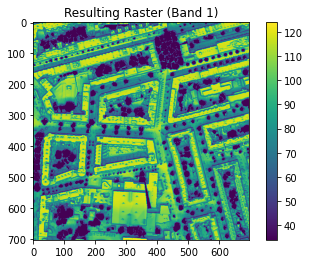

In [37]:
# Plot the resulting raster (you can choose a band to visualize)
# For example, to plot the first band:
plt.imshow(raster_data[7], cmap='viridis')
plt.colorbar()
plt.title('Resulting Raster (Band 1)')
plt.show()

In [38]:
# Calculate per pixel shade index
for band in range(raster_data.shape[0]):
    max_value = np.max(raster_data[band])
    raster_data[band] = 1 - (raster_data[band]/max_value)

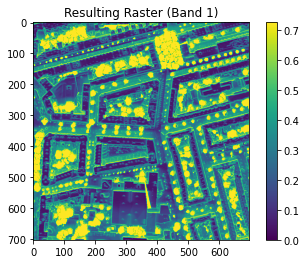

In [39]:
# Plot the resulting raster (you can choose a band to visualize)
# For example, to plot the first band:
plt.imshow(raster_data[7], cmap='viridis')
plt.colorbar()
plt.title('Resulting Raster (Band 1)')
plt.show()

In [8]:
# Save the modified raster including all bands
output_raster_file = "../results/output/2236_shade_index.tif"
with rasterio.open(output_raster_file, 'w', driver='GTiff', width=raster_data.shape[2], height=raster_data.shape[1], count=raster_data.shape[0], dtype=raster_data.dtype, crs=src.crs, transform=raster_transform) as dest:
    for band_idx in range(raster_data.shape[0]):
        dest.write(raster_data[band_idx], band_idx + 1)

Shade index on verhardingen

In [13]:
# Open the raster file using Rasterio to get its extent
shade_index = "../results/output/2236_shade_index.tif"
with rasterio.open(shade_index) as src:
    shade_extent = src.bounds
    raster_bbox = box(src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)
    raster_crs = src.crs


<AxesSubplot:>

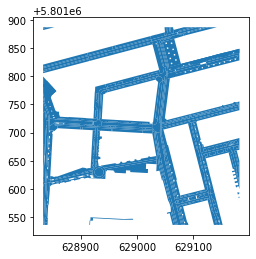

In [10]:
# Open the GeoPackage vector file using GeoPandas, filtering by the raster extent
verhardingen_file = "../../Land_Surface_Temperature/data/raw_data/AMS/verhardingen/Q1_20230126_ingekort.gpkg"
verhardingen = gpd.read_file(verhardingen_file).to_crs(raster_crs)
verhardingen.geometry = verhardingen.geometry.buffer(0)
#No need to intersect, can directly clip.
# verhardingen = verhardingen[verhardingen.intersects(raster_bbox)]
verhardingen = verhardingen.clip(raster_bbox)
verhardingen.plot()


In [22]:
verhardingen.head()

Guid         Objecttype  \
33751   {60F03032-AD6F-4549-A49C-3E9D6ACF6E2C}  Verhardingsobject   
33749   {5B6CD7BB-E777-4ACA-A6D4-68A7C9212EF8}  Verhardingsobject   
163955  {950F2985-C8E1-4374-9A2E-65714054731F}  Verhardingsobject   
100979  {DBCA41ED-B8D5-4ABE-9868-789080E5BE1F}  Verhardingsobject   
177810  {50ACB96A-B3DF-44D0-BCA0-E1A927AF3773}  Verhardingsobject   

                       Type Type_gedetailleerd Type_extra_gedetailleerd  \
33751   Elementenverharding  Betonstraatstenen               Betonsteen   
33749   Elementenverharding  Betonstraatstenen               Betonsteen   
163955     Asfaltverharding    Dichte deklagen              Asfaltbeton   
100979  Elementenverharding             Tegels               Betontegel   
177810  Elementenverharding     Straatbaksteen           Gebakken steen   

        Kleur Type_rijstrook Gebruiksfunctie            Wegtype_bestaand  \
33751   Grijs           None      Parkeervak       5 - Weg in woongebied   
33749   Grijs           None      Parkeervak       5 - Weg in woongebied   
163955  Grijs           None         OV-baan       2 - Zwaar belaste weg   
100979  Grijs           None         Voetpad  6 - Weg in verblijfsgebied   
177810   Rood           None         Voetpad  6 - Weg in verblijfsgebied   

        Jaar_uitgevoerd_onderhoud  Jaar_laatste_conservering  Jaar_van_aanleg  \
33751                      2010.0                        NaN           1990.0   
33749                         NaN                        NaN           2017.0   
163955                        NaN                        NaN           2017.0   
100979                     2005.0                        NaN           1980.0   
177810                        NaN                        NaN           2022.0   

        Oppervlakte_GIS Beheerder_gedetailleerd Onderhoudsplichtige  \
33751         14.940000    R&E_VOR_Verhardingen                None   
33749         13.060000    R&E_VOR_Verhardingen                None   
163955       306.510000    R&E_VOR_Verhardingen                None   
100979       187.340000    R&E_VOR_Verhardingen                None   
177810         6.046749    R&E_VOR_Verhardingen                None   

                                                 geometry  
33751   POLYGON ((628845.297 5801688.840, 628845.316 5...  
33749   POLYGON ((628844.295 5801701.420, 628845.817 5...  
163955  POLYGON ((628836.396 5801737.397, 628836.666 5...  
100979  POLYGON ((628899.738 5801710.060, 628899.503 5...  
177810  POLYGON ((628838.746 5801710.900, 628838.816 5...

In [11]:
## "SIMPLE" METHOD CALCULATING JUST THE AVERAGE USING A MASK FOR EACH INDIVIDUAL POLYGON

#Calculate shade index per verhardingen surface for all of the months and add them as individual columns.
with rasterio.open(shade_index) as src:
    # Read the raster bands
    bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]
    # Get the raster's spatial reference
    crs = src.crs
     # Iterate over the polygons
    for index, row in verhardingen.iterrows():
        polygon = row['geometry']
        # Initialize a list to store average values for each band
        average_values = []
        # Iterate over the bands
        for band_idx, band in enumerate(bands):
            # Use the polygon to clip the band
            clipped_band, _ = rasterio.mask.mask(src, [polygon], crop=True, nodata=np.nan, indexes=band_idx + 1)
            # Calculate the average pixel value for this band within the polygon
            average_pixel_value = np.nanmean(clipped_band)
            average_values.append(average_pixel_value)
        # Add the average pixel values to new columns in the GeoDataFrame
        for band_idx, avg_value in enumerate(average_values):
            verhardingen.at[index, f'Shade_index_M_{band_idx+1}'] = avg_value

/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_92376/2920478750.py:19: RuntimeWarning: Mean of empty slice
  average_pixel_value = np.nanmean(clipped_band)


In [12]:
from rasterstats import zonal_stats

In [14]:
## Nice method to easily get more descriptive statistics for each verhardingen surface.

#Calculate shade index per verhardingen surface for all of the months and add them as individual columns.
verhardingen = verhardingen.reset_index()
with rasterio.open(shade_index) as src:
    # Read the raster bands
    bands = [src.read(band_idx) for band_idx in range(1, src.count + 1)]
    affine = src.transform
    crs = src.crs
    month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Iterate over bands and compute statistics for the whole verhardingen dataset
    for band_idx, band in enumerate(bands):
        band_stats = zonal_stats(verhardingen, band, affine=affine, stats=['min','max','mean','median','sum','range','std'], nodata=-999)
        #band_stats are saved in a dictionary. We use the dictionary to add these to the respective row in verhardingen, creating a new column for each stat and band.
        for idx, item in verhardingen.iterrows():
            row_stats = band_stats[idx]
            for key, value in row_stats.items():
                verhardingen.at[idx, f'SI_{month_list[band_idx]}_{key}'] = value


In [6]:
verhardingen.head()

index                                    Guid         Objecttype  \
0   33751  {60F03032-AD6F-4549-A49C-3E9D6ACF6E2C}  Verhardingsobject   
1   33749  {5B6CD7BB-E777-4ACA-A6D4-68A7C9212EF8}  Verhardingsobject   
2  163955  {950F2985-C8E1-4374-9A2E-65714054731F}  Verhardingsobject   
3  100979  {DBCA41ED-B8D5-4ABE-9868-789080E5BE1F}  Verhardingsobject   
4  177810  {50ACB96A-B3DF-44D0-BCA0-E1A927AF3773}  Verhardingsobject   

                  Type Type_gedetailleerd Type_extra_gedetailleerd  Kleur  \
0  Elementenverharding  Betonstraatstenen               Betonsteen  Grijs   
1  Elementenverharding  Betonstraatstenen               Betonsteen  Grijs   
2     Asfaltverharding    Dichte deklagen              Asfaltbeton  Grijs   
3  Elementenverharding             Tegels               Betontegel  Grijs   
4  Elementenverharding     Straatbaksteen           Gebakken steen   Rood   

  Type_rijstrook Gebruiksfunctie            Wegtype_bestaand  ...  SI_Nov_std  \
0           None      Parkeervak       5 - Weg in woongebied  ...    0.035354   
1           None      Parkeervak       5 - Weg in woongebied  ...    0.027896   
2           None         OV-baan       2 - Zwaar belaste weg  ...    0.088008   
3           None         Voetpad  6 - Weg in verblijfsgebied  ...    0.077591   
4           None         Voetpad  6 - Weg in verblijfsgebied  ...    0.088449   

   SI_Nov_median  SI_Nov_range  SI_Dec_min SI_Dec_max SI_Dec_mean  SI_Dec_sum  \
0       0.792850      0.213379    0.566884   0.782527    0.775531   44.205288   
1       0.792850      0.154122    0.614390   0.782527    0.776445   40.375126   
2       0.528608      0.304283    0.496964   0.782527    0.565106  580.363770   
3       0.618477      0.396811    0.425551   0.782527    0.632594  473.813171   
4       0.591480      0.202083    0.563198   0.782527    0.635297   15.247131   

   SI_Dec_std  SI_Dec_median  SI_Dec_range  
0    0.036810       0.782527      0.215643  
1    0.030472       0.782527      0.168136  
2    0.083438       0.535078      0.285562  
3    0.081235       0.592775      0.356976  
4    0.095800       0.563959      0.219328  

[5 rows x 101 columns]

In [15]:
# Save for vis.
verhardingen_repr = verhardingen.to_crs(4326)
verhardingen_repr.to_file('../results/output/2236_shade_index.geojson', driver='GeoJSON')

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [17]:
# Save for vis.
verhardingen_repr = verhardingen.to_crs(4326)
verhardingen_repr.to_file('../results/output/2236_shade_index_test.json', driver='GeoJSON')

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


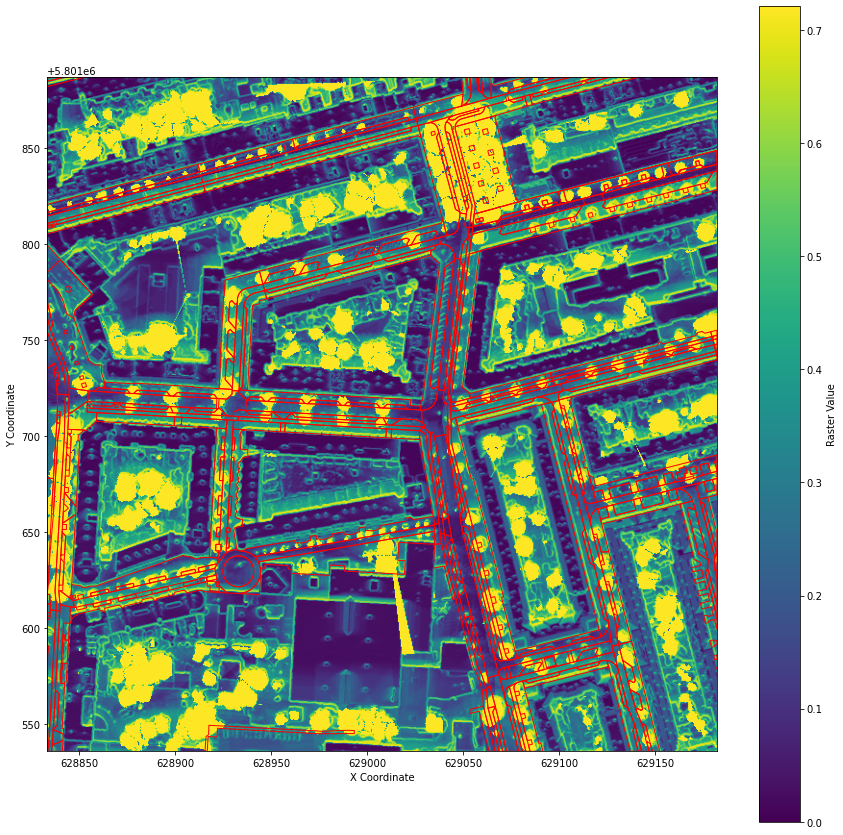

In [16]:
with rasterio.open(shade_index) as src:
    # Read the raster data for visualization (you can choose a specific band if needed)
    raster_data = src.read(7)  # Replace "1" with the band index you want to visualize
    raster_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]



# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the raster data
cax = ax.imshow(raster_data, cmap='viridis', extent=raster_extent, origin='upper')

# Plot the vector data on top
verhardingen.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)

# Add a colorbar for the raster
plt.colorbar(cax, ax=ax, label='Raster Value')

# Set axis labels
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Show the plot
plt.show()

# Visualisation

In [26]:
import matplotlib

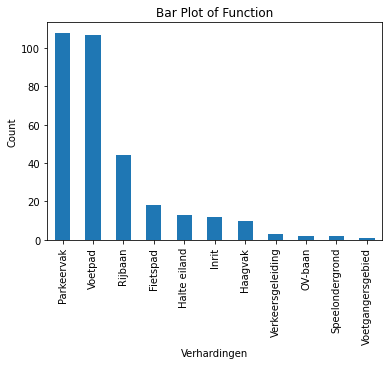

In [7]:
# Group data by the column and count the occurrences
counts = verhardingen["Gebruiksfunctie"].value_counts()

# Plot the bar chart
counts.plot(kind='bar')
plt.xlabel('Verhardingen')
plt.ylabel('Count')
plt.title(f'Bar Plot of Function')
plt.show()

In [8]:
import seaborn as sns

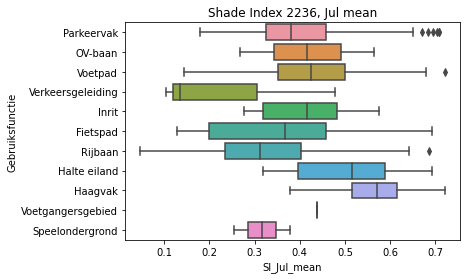

In [22]:
month = 'Jul'
stat = 'mean'
sns.boxplot(data=verhardingen, x=verhardingen[f'SI_{month}_{stat}'],y=verhardingen['Gebruiksfunctie']).set(title=f'Shade Index 2236, {month} {stat}')
# seaborn.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'figure.figsize':(11.7,8.27)})
# seaborn.set_theme(style='whitegrid')
# plt.xlabel('Temp. difference in °C')
# plt.tight_layout()
# plt.savefig('../results/figures/Airtemp_LST_NL_DateTime_1050.png', dpi=300)
plt.show()

In [15]:
verhardingen['SI_Jul_mean'].describe()

count    318.000000
mean       0.401847
std        0.134487
min        0.047668
25%        0.315829
50%        0.391482
75%        0.480527
max        0.720760
Name: SI_Jul_mean, dtype: float64